# Data Mining & Machine Learning : Car Auction


The used dataset can be found here:
https://drive.google.com/file/d/1fNNhPqfZGmhzruPPxWFmQGVLQgAkPGZM/view?usp=sharing

<h1>Part 1: Data Mining</h1>

In [2]:
# importing librairies
import pandas as pd
import matplotlib.pyplot as plt

#### Let's get to know our dataset

In [3]:
dataset = pd.read_csv('dataset_car_auction.csv', sep=';')
dataset.head(5)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
0,326,10/25/2010,ADESA,2008,2,KIA,BLUE,AUTO,2.0,Covers,...,10805.0,6628.0,7535.0,9605.0,10650.0,33619,FL,533,6100.0,1
1,42991,5/27/2009,MANHEIM,2006,3,DODGE,SILVER,AUTO,2.0,Covers,...,7478.0,5480.0,6461.0,6418.0,7478.0,32124,FL,1630,4000.0,0
2,55273,3/18/2010,OTHER,2008,2,DODGE,BLACK,AUTO,2.0,Covers,...,11652.0,7497.0,8102.0,10721.0,11350.0,74135,OK,693,7500.0,0
3,29058,06/08/2009,OTHER,2005,4,FORD,BROWN,AUTO,2.0,Covers,...,7691.0,4817.0,6658.0,5702.0,7691.0,85018,AZ,1633,4725.0,0
4,34991,03/04/2009,MANHEIM,2005,4,CHRYSLER,BLUE,AUTO,1.0,Alloy,...,7664.0,5370.0,6811.0,6300.0,7856.0,75236,TX,1623,5670.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              58386 non-null  int64  
 1   PurchDate                          58386 non-null  object 
 2   Auction                            58386 non-null  object 
 3   VehYear                            58386 non-null  int64  
 4   VehicleAge                         58386 non-null  int64  
 5   Make                               58386 non-null  object 
 6   Color                              58379 non-null  object 
 7   Transmission                       58378 non-null  object 
 8   WheelTypeID                        55813 non-null  float64
 9   WheelType                          55809 non-null  object 
 10  VehOdo                             58386 non-null  int64  
 11  Size                               58382 non-null  obj

In [4]:
dataset.shape

(58386, 25)

In [5]:
dataset.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,WarrantyCost,VehBCost,IsBadBuy
count,58386.000000,58386.000000,58386.000000,55813.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36567.888449,2005.344637,4.174956,1.495566,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,58125.258195,1276.105042,6730.008335,0.123454
std,21092.254801,1.733307,1.713833,0.520802,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,26146.806098,598.885423,1762.075265,0.328961
min,1.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2764.000000,462.000000,1.000000,0.000000
25%,18270.250000,2004.000000,3.000000,1.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,32124.000000,837.000000,5430.000000,0.000000
50%,36608.500000,2005.000000,4.000000,1.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,74135.000000,1155.000000,6700.000000,0.000000
75%,54811.500000,2007.000000,5.000000,2.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,80022.000000,1623.000000,7900.000000,0.000000
max,73014.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99224.000000,7498.000000,36485.000000,1.000000


<h2>1. Data visualization and exploration </h2>

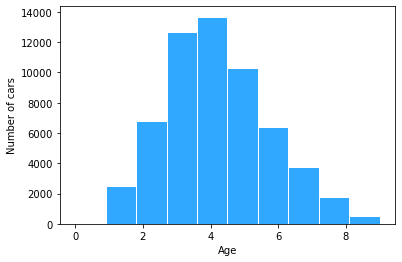

In [6]:
plt.hist(dataset.VehicleAge,
        bins=10,
        facecolor="#31a8ff",
       edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Number of cars")
plt.show()

Most cars are aged between 3 and 5 years

In [7]:
dataset.IsBadBuy.value_counts()

0    51178
1     7208
Name: IsBadBuy, dtype: int64

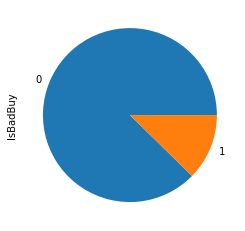

In [8]:
dataset.IsBadBuy.value_counts().plot(kind="pie" )
plt.show()

dataset counts ***58386*** records (total amount of cars), of which ***7208*** have been returned as bad purchases
**87%**, while the remaining ***13%*** are good buys.

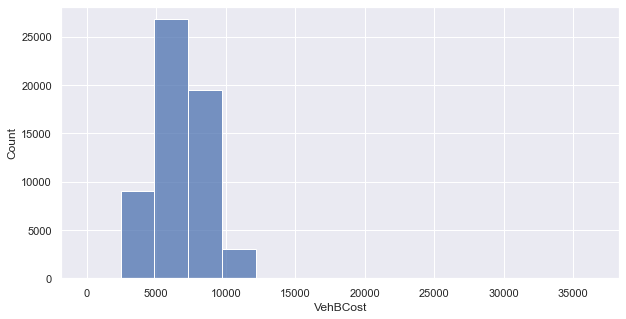

In [8]:
import seaborn as sb
sb.set(rc={'figure.figsize':(10,5)})
sb.histplot(dataset.VehBCost, bins=15)
sb.set_style("whitegrid")

we can observe that Vehicles are usually sold for a price between 3500 and 12000, and a very low percentage of cars is
sold above 15000 or below 2500.

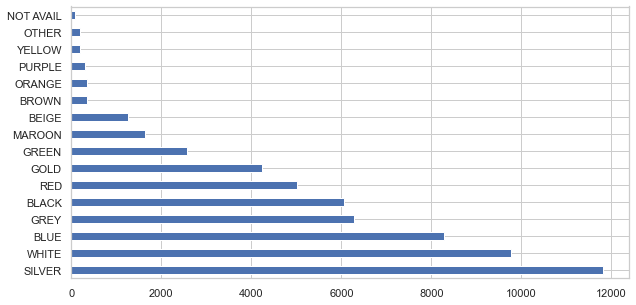

In [10]:
dataset.Color.value_counts().plot(kind="barh" )
plt.show()

the most three common colours are **silver**, **white**, and **blue**.

### other features plots and insights

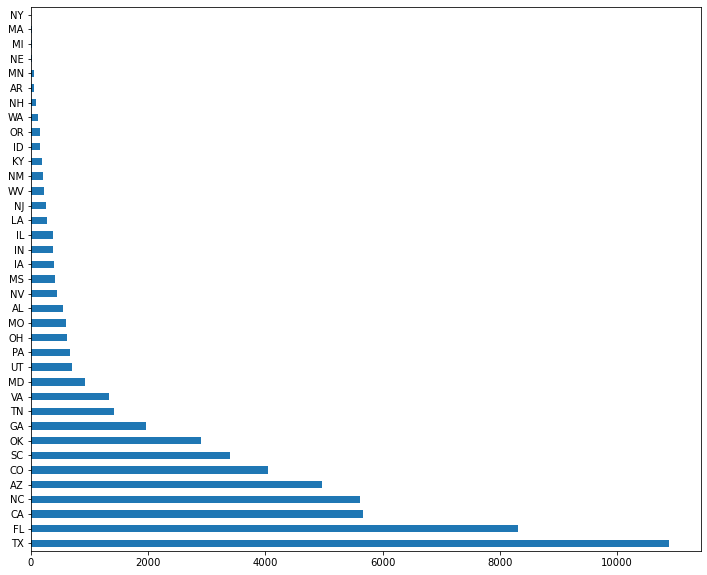

In [10]:
plt.figure(figsize=(12, 10))
dataset.VNST.value_counts().plot(kind="barh" )
plt.show()

we observe that most cars are sold in **Texas** and **Florida**

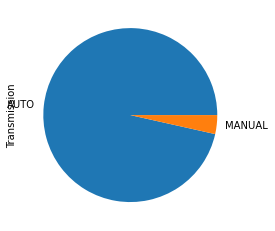

In [14]:
dataset.Transmission.value_counts().plot(kind="pie" )
plt.show()

As we can see, the vast majority of cars have **automatic transmission**

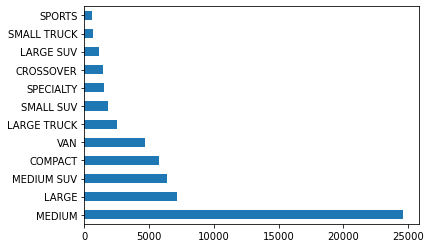

In [17]:
dataset.Size.value_counts().plot(kind="barh" )
plt.show()

About 50% of cars are **medium**

### Correlation matrix between numerical features

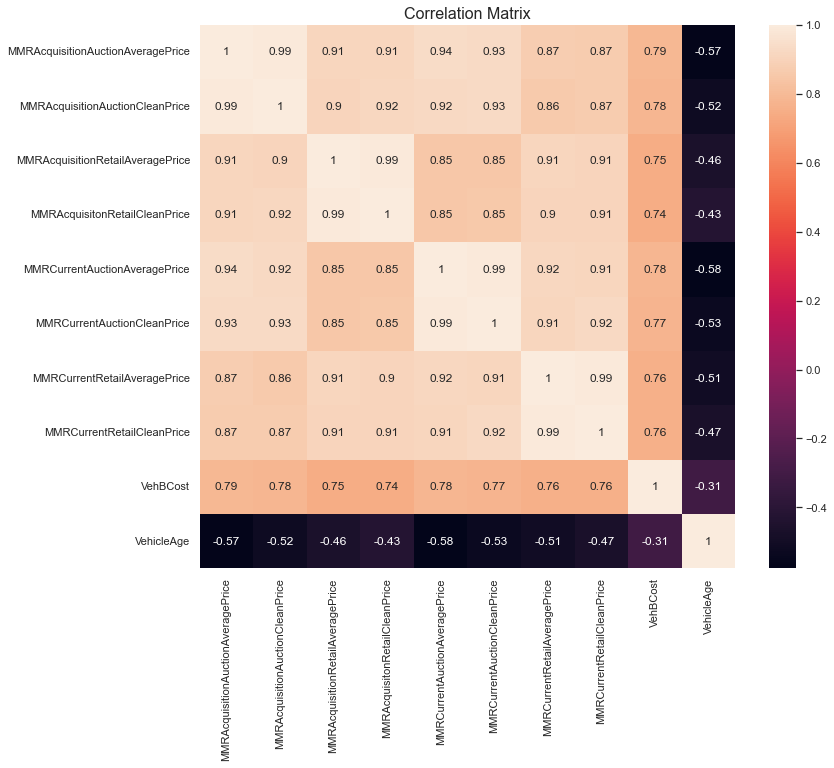

In [10]:
# defining numerical variables
columns = ['MMRAcquisitionAuctionAveragePrice',
           'MMRAcquisitionAuctionCleanPrice',
           'MMRAcquisitionRetailAveragePrice',
           'MMRAcquisitonRetailCleanPrice',
           'MMRCurrentAuctionAveragePrice',
           'MMRCurrentAuctionCleanPrice',
           'MMRCurrentRetailAveragePrice',
           'MMRCurrentRetailCleanPrice',
           'VehBCost', 'VehicleAge']

# plotting the correlation matrix
plt.figure(figsize=(12, 10))
sb.heatmap(dataset[columns].corr(), annot = True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<h2>2. Missing value imputation</h2>

Check for duplicate RefId and remove them

In [18]:
dataset.RefId.duplicated().sum()

0

In [19]:
dataset.RefId.drop_duplicates(keep='last')

0          326
1        42991
2        55273
3        29058
4        34991
         ...  
58381    20065
58382    12550
58383    15626
58384    21224
58385    40898
Name: RefId, Length: 58386, dtype: int64

we observe that there weren't any **RefId** duplicates

In [20]:
dataset.shape

(58386, 25)

Quantify missing values

In [21]:
dataset.isnull().sum()

RefId                                   0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   7
Transmission                            8
WheelTypeID                          2573
WheelType                            2577
VehOdo                                  0
Size                                    4
MMRAcquisitionAuctionAveragePrice      13
MMRAcquisitionAuctionCleanPrice        13
MMRAcquisitionRetailAveragePrice       13
MMRAcquisitonRetailCleanPrice          13
MMRCurrentAuctionAveragePrice         245
MMRCurrentAuctionCleanPrice           245
MMRCurrentRetailAveragePrice          245
MMRCurrentRetailCleanPrice            245
VNZIP1                                  0
VNST                                    0
WarrantyCost                            0
VehBCost                          

We see that WheelTypeID and WheelType have 2573 missing values. MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice have 245 missing values. 

We are going to perform mean value imputation for all numerical features and frequent occurring value for
categorical features.

#### Let's deal with numerical features first

In [22]:
columns = ['MMRAcquisitionAuctionAveragePrice',
           'MMRAcquisitionAuctionCleanPrice',
           'MMRAcquisitionRetailAveragePrice',
           'MMRAcquisitonRetailCleanPrice',
           'MMRCurrentAuctionAveragePrice',
           'MMRCurrentAuctionCleanPrice',
           'MMRCurrentRetailAveragePrice',
           'MMRCurrentRetailCleanPrice']

for col in columns :
    dataset[col].fillna(dataset[col].mean(), inplace=True)  # replace the null value with the mean of the column

#### Now the categorical features.

In [23]:
columns = ['WheelTypeID',
           'WheelType',
           'Color',
           'Size',
           'Transmission']

for col in columns :
    # replace the null value with the most occurring value 
    # mode() function returns a list of the most frequent value in a col
    dataset[col].fillna(dataset[col].mode().iloc[0], inplace=True)  

now let's verify if there any null values left 

In [24]:
dataset.isnull().sum()

RefId                                0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNZIP1                               0
VNST                                 0
WarrantyCost                         0
VehBCost                             0
IsBadBuy                             0
dtype: int64

Hooraay ! no more missing values !

<h2>3. Feature Engineering</h2>

**RefId** and **WheelTypeID** are unnecessary attributes. So let's remove them !

In [25]:
dataset.drop(columns=['RefId','WheelTypeID'], inplace=True, axis=1)

we have **VehicleAge** which captures vehicule age, and **VehYear** from which we obtain the vehicule age too. It's unnecessary. Let's drop it

In [26]:
dataset.drop('VehYear', inplace=True, axis=1)

The features **VNZIP1** and **VNST** both describe the location of the auction where the car is bought, so we keep just **VNST** this tells us a state instead of a very specific ZIP.

In [27]:
dataset.drop('VNZIP1', inplace=True, axis=1)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          58386 non-null  object 
 1   Auction                            58386 non-null  object 
 2   VehicleAge                         58386 non-null  int64  
 3   Make                               58386 non-null  object 
 4   Color                              58386 non-null  object 
 5   Transmission                       58386 non-null  object 
 6   WheelType                          58386 non-null  object 
 7   VehOdo                             58386 non-null  int64  
 8   Size                               58386 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  58386 non-null  float64
 10  MMRAcquisitionAuctionCleanPrice    58386 non-null  float64
 11  MMRAcquisitionRetailAveragePrice   58386 non-null  flo

we see that the VNZIP1, VehYear, WheelTypeID and RefId are dropped.

Split the purchase date **purchDate** into three separate features based on date, month
and year.

In [29]:
# deviding purchDate in 3 setparete columns and affecting them to sep_dates table
sep_dates = dataset['PurchDate'].str.split("/", expand = True)
sep_dates.head()

,0,1,2
0,10,25,2010
1,5,27,2009
2,3,18,2010
3,06,08,2009
4,03,04,2009


In [30]:
# creating new columns from sep_dates
dataset['Day'] = sep_dates[1]
dataset['Month'] = sep_dates[0]
dataset['Year'] = sep_dates[2]

# dropping the "PurchDate" col since we have the new 3 columns
dataset.drop('PurchDate', inplace=True, axis=1)

# displaying our new dataset
dataset.head()

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy,Day,Month,Year
0,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,7555.0,...,7535.0,9605.0,10650.0,FL,533,6100.0,1,25,10,2010
1,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,6461.0,...,6461.0,6418.0,7478.0,FL,1630,4000.0,0,27,5,2009
2,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,8580.0,...,8102.0,10721.0,11350.0,OK,693,7500.0,0,18,3,2010
3,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,6658.0,...,6658.0,5702.0,7691.0,AZ,1633,4725.0,0,08,06,2009
4,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,6633.0,...,6811.0,6300.0,7856.0,TX,1623,5670.0,0,04,03,2009


Keep only cars where WheelType is in (Alloy, Covers)

In [31]:
dataset.WheelType.value_counts() # display WheelType values and the count of each one

Alloy      31312
Covers     26485
Special      589
Name: WheelType, dtype: int64

In [32]:
# kepping just the rows with "Alloy" or "Covers"
dataset = dataset[ (dataset['WheelType']=='Alloy') | (dataset['WheelType']=='Covers') ]

In [33]:
# diplay the new count
dataset.WheelType.value_counts()

Alloy     31312
Covers    26485
Name: WheelType, dtype: int64

#### Dummy code the categorical features

In [34]:
categ_feat = ['Auction','Make','WheelType','Color','Transmission','VNST','Size','Day','Month','Year']
ds = pd.get_dummies(dataset, columns=categ_feat)
ds.dtypes

VehicleAge                             int64
VehOdo                                 int64
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
                                      ...   
Month_7                                uint8
Month_8                                uint8
Month_9                                uint8
Year_2009                              uint8
Year_2010                              uint8
Length: 172, dtype: object

#### Perform a Standardization to the continuous variables

In [35]:
df = ds
num_feat = ['VehicleAge','VehOdo',
            'VehBCost','WarrantyCost',
            'MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',
            'MMRCurrentAuctionCleanPrice',
            'MMRCurrentRetailAveragePrice',
            'MMRCurrentRetailCleanPrice']

for col in num_feat:
    #  standardizing columns by subtracting the mean and dividing by the standard deviation
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
df.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Year_2009,Year_2010
0,-1.265509,-0.704985,0.271949,0.067087,0.521782,0.282592,0.204558,0.054299,0.269409,0.153418,...,0,0,0,0,0,0,0,0,0,1
1,-0.682100,1.432857,-0.264266,-0.336278,-0.660179,-0.702968,-0.268885,-0.347417,-0.766020,-0.809294,...,0,0,0,1,0,0,0,0,1,0
2,-1.265509,-1.747832,0.789829,0.445011,0.818066,0.533499,0.562940,0.266377,0.631988,0.365870,...,0,1,0,0,0,0,0,0,0,1
3,-0.098690,0.595920,-0.534411,-0.263643,-0.887552,-0.639870,-0.542310,-0.273731,-0.998642,-0.744648,...,0,0,0,0,0,0,0,0,1,0
4,-0.098690,0.404262,-0.284639,-0.272861,-0.677327,-0.647869,-0.314249,-0.216504,-0.804357,-0.694570,...,0,0,0,0,0,0,0,0,1,0


After examinating our new dataframe columns we notice that the name of some columns may be a problem while dealing with them in Machine Learning/Deep Learning algorithms. e.g. "Make_TOYOTA SCION" should be named "Make_TOYOTA_SCION" instead because some functions don't understand the " " white space in the name.

In [36]:
df.rename(columns = {'Color_NOT AVAIL':'Color_NOT_AVAIL',
                     'Make_TOYOTA SCION':'Make_TOYOTA_SCION',
                     'Size_LARGE SUV':'Size_LARGE_SUV',
                     'Size_LARGE TRUCK':'Size_LARGE_TRUCK',
                    'Size_MEDIUM SUV':'Size_MEDIUM_SUV',
                    'Size_SMALL SUV':'Size_SMALL_SUV',
                    'Size_SMALL TRUCK':'Size_SMALL_TRUCK'}
          , inplace = True)

In [37]:
df.shape

(57797, 172)

the new shape of our dataset after EDA and feature enginnering is 172 columns(features) and 57797 rows.

### Apply principal component Analysis (PCA)

In [32]:
# importing librairies
from sklearn.decomposition import PCA

Since we already scaled our data, let's apply PCA with `n_components = 4` directly on our scaled dataset

In [33]:
sklearn_pca = PCA(n_components=4)
reduced_data = sklearn_pca.fit_transform(ds.values)

In [34]:
reduced_data

array([[-6.16124764e+02, -7.52190229e+02, -1.68028560e+00,
         4.34663912e-01],
       [-2.73039400e+03,  3.17053425e+02, -2.23643408e+00,
         2.17712837e-01],
       [ 7.81646314e+02, -5.73763301e+02, -8.85906839e-01,
         1.49646971e+00],
       ...,
       [ 2.68385765e+02,  4.29564430e+02, -1.60762944e+00,
         6.50543899e-01],
       [-1.19188111e+03, -6.98767319e+02,  3.78214377e-01,
        -1.96577935e+00],
       [-3.48802822e+03,  1.32058458e+02,  2.07843967e+00,
        -2.50790630e-01]])

In [35]:
print("Explained variance ratio : ")
print(sklearn_pca.explained_variance_ratio_)
print("\nPrinccipal Ccomponents : ")
print(sklearn_pca.components_)

Explained variance ratio : 
[8.95927476e-01 1.04069076e-01 8.64065861e-07 3.44075730e-07]

Princcipal Ccomponents : 
[[-1.78943729e-04 -3.89747945e-05  4.49048151e-04  4.44265721e-04
   4.24518889e-04  4.23808344e-04  4.42001471e-04  4.39845261e-04
   4.29898159e-04  4.29672387e-04 -1.31725317e-02  9.99912452e-01
  -1.84881357e-05 -4.67006448e-06 -1.29515533e-06  5.96521981e-06
   3.32072084e-07 -1.69909467e-06  4.05459362e-07  7.23204903e-06
  -7.95016485e-06  1.75766611e-05 -1.66507361e-05  4.37104257e-06
   3.85435194e-06  2.90448843e-08 -5.80288176e-06  5.92466638e-07
   5.51920263e-07  8.58292648e-06 -8.46767664e-06  8.77346335e-07
   4.34981798e-07  1.29610066e-06 -2.06299194e-06  1.73175273e-07
  -5.96685639e-07  1.00249148e-05 -2.48087917e-06 -2.00489016e-08
  -2.58769869e-06 -1.01372522e-05  4.68144176e-07  2.03625789e-07
  -7.99530783e-06  8.21126872e-06 -6.47550995e-09  7.05074535e-07
   5.35267387e-07  4.57659851e-05 -4.57659851e-05  1.13946835e-07
   1.36543587e-05 -4.1471

<h1>Part 2: Machine Learning</h1>

First, we import the needed librairies

In [44]:
# model training
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score # F1-score

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression

Let's define our x and y columns

In [65]:
x = df.drop(columns=['IsBadBuy'])
y = df['IsBadBuy']

now split our data into test set (25%) and train set (75%)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

Let's apply ML algotithms on our splited data

In [67]:
IsBadBuy_train_acc = []
IsBadBuy_test_acc = []

### Logistic regression

In [68]:
# Logistic regression
LR = LogisticRegression()
LR.fit(x_train, y_train);
# calculating metrics for training set
logReg_train_acc = LR.score(x_train,y_train) # or accuracy_score(y_test,LR.predict(x_test))
logReg_train_f1 = f1_score(y_train, LR.predict(x_train), average='weighted')
# calculating metrics for test set
logReg_test_acc = LR.score(x_test,y_test) # or accuracy_score(y_test,LR.predict(x_test))
logReg_test_f1 = f1_score(y_test, LR.predict(x_test), average='weighted')
# append the calculated scores to their lists
IsBadBuy_train_acc.append(logReg_train_acc)
IsBadBuy_test_acc.append(logReg_test_acc)

print('\ttraining set')
print('accuracy :', logReg_train_acc)
print('f1-score :', logReg_train_f1)
print('\ttest set')
print('accuracy :', logReg_test_acc)
print('f1-score :', logReg_test_f1)

	training set
accuracy : 0.8767619443098715
f1-score : 0.819505850157617
	test set
accuracy : 0.875916955017301
f1-score : 0.8183113077481056


### Support Vector machine


In [69]:
# Support Vector Machine
SVM = SVC()
SVM.fit(x_train, y_train, sample_weight=None)
# calculating metrics for training set
svm_train_acc = SVM.score(x_train,y_train) # or accuracy_score(y_test,LR.predict(x_test))
svm_train_f1 = f1_score(y_train, SVM.predict(x_train), average='weighted')
# calculating metrics for test set
svm_test_acc = SVM.score(x_test,y_test) # or accuracy_score(y_test,LR.predict(x_test))
svm_test_f1 = f1_score(y_test, SVM.predict(x_test), average='weighted')
# append the calculated scores to their lists
IsBadBuy_train_acc.append(svm_train_acc)
IsBadBuy_test_acc.append(svm_test_acc)

print('\ttraining set')
print('accuracy :', svm_train_acc)
print('f1-score :', svm_train_f1)
print('\ttest set')
print('accuracy :', svm_test_acc)
print('f1-score :', svm_test_f1)

	training set
accuracy : 0.8768080836044017
f1-score : 0.81944002730463
	test set
accuracy : 0.8760553633217993
f1-score : 0.818246775628315


### Nearest neighbors


In [70]:
# K-Nearest neighbors
Kneigh = KNeighborsClassifier(n_neighbors=4)
Kneigh.fit(x_train, y_train)
# calculating metrics for training set
knn_train_acc = Kneigh.score(x_train,y_train) # or accuracy_score(y_test,LR.predict(x_test))
knn_train_f1 = f1_score(y_train, Kneigh.predict(x_train), average='weighted')
# calculating metrics for test set
knn_test_acc = Kneigh.score(x_test,y_test) # or accuracy_score(y_test,LR.predict(x_test))
knn_test_f1 = f1_score(y_test, Kneigh.predict(x_test), average='weighted')
# append the calculated scores to their lists
IsBadBuy_train_acc.append(knn_train_acc)
IsBadBuy_test_acc.append(knn_test_acc)

print('\ttraining set')
print('accuracy :', knn_train_acc)
print('f1-score :', knn_train_f1)
print('\ttest set')
print('accuracy :', knn_test_acc)
print('f1-score :', knn_test_f1)

	training set
accuracy : 0.8824832168316147
f1-score : 0.8365471864847921
	test set
accuracy : 0.8705190311418685
f1-score : 0.8200185183353857


### Deep Neural Network

In [71]:
# importing librairies
import tensorflow as tf

#### Creating 'features Column' for TensorFlow

In [72]:
def create_feature_column():
    feature_column = []
    col_list = x.columns.tolist()
    for col in col_list:
        col = tf.feature_column.numeric_column(col)
        #globals()["feat_{col}"] = tf.feature_column.numeric_column(col)
        feature_column.append(col)

    return feature_column

In [73]:
feature_column = create_feature_column()

##### Model construction

DNN network with 3 levels with 512, 256, 128 units respectively.


In [74]:
dnnmodel = tf.compat.v1.estimator.DNNClassifier(hidden_units = [512, 256, 128],
                                                feature_columns = feature_column,
                                                n_classes=2,
                                                activation_fn=tf.nn.softmax,
                                                dropout=None,
                                                optimizer = tf.compat.v1.train.AdamOptimizer (learning_rate=0.001))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\asus\\AppData\\Local\\Temp\\tmpb01hye2l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


##### DNN Model training

Creating input data according to TensorFlow Model

In [75]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x_train,
                                                          y_train,
                                                          batch_size=50,
                                                          num_epochs=1000,
                                                          shuffle=False)

dnnmodel.train(input_fn=input_func, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\asus\AppData\Local\Temp\tmpb01hye2l\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 34.32645, step = 0
INFO:tensorflow:global_step/sec: 55.7343
INFO:tensorflow:loss = 31.993507, step = 100 (1.796 sec)
INFO:tensorflow:global_step/sec: 56.5289
INFO:tensorflow:loss = 25.952871, step = 200 (1.770 sec)
INFO:tensorflow:global_step/sec: 58.9557
INFO:tensorflow:loss = 25.852842, step = 300 (1.695 sec)
INFO:tensorflow:global_step/sec: 59.7021
INFO:tensorflow:loss = 25.817291, step = 400 (1.677 sec)
INFO:tensorflow:global_step/sec: 56.4352
INFO:tensorflow:loss = 22.05572, ste

#### Model Evaluation

Creating evaluation data according to TensorFlow Model

In [76]:
# evalution function for the training set
train_eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn (x_train,
                                                           y_train,
                                                           batch_size=50,
                                                           num_epochs=1,
                                                           shuffle=False)


# evalution function for the test set
test_eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn (x_test,
                                                           y_test,
                                                           batch_size=50,
                                                           num_epochs=1,
                                                           shuffle=False)

dnnmodel_eval_train = dnnmodel.evaluate(train_eval_func)
dnnmodel_eval_test = dnnmodel.evaluate(test_eval_func)

# adding accuracies to their lists
IsBadBuy_train_acc.append(dnnmodel_eval_train['accuracy'])
IsBadBuy_test_acc.append(dnnmodel_eval_test['accuracy'])
# printing evaluation model for the test set
dnnmodel_eval_test

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-03T00:42:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\asus\AppData\Local\Temp\tmpb01hye2l\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 14.69520s
INFO:tensorflow:Finished evaluation at 2022-04-03-00:42:54
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8766235, accuracy_baseline = 0.8766235, auc = 0.5, auc_precision_recall = 0.56168824, average_loss = 0.37362146, global_step = 5000, label/mean = 0.123376474, loss = 18.679781, precision = 0.0, prediction/mean = 0.12562427, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\asus\AppData\Local\Temp\tmpb01hye2l\model.ckpt-5000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at

{'accuracy': 0.87598616,
 'accuracy_baseline': 0.87598616,
 'auc': 0.5,
 'auc_precision_recall': 0.56200695,
 'average_loss': 0.3748584,
 'label/mean': 0.12401384,
 'loss': 18.74292,
 'precision': 0.0,
 'prediction/mean': 0.12562312,
 'recall': 0.0,
 'global_step': 5000}

#### Conclusion

In [77]:
# generating our scores dataframe
model_names = ['Logistic Reg','KNN','SVM','DNN']
accuracy_record = pd.DataFrame({'Model': model_names,
                                'train accuracy':IsBadBuy_train_acc,
                                'test accuracy': IsBadBuy_test_acc,
                                })
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

print(accuracy_record)

              train accuracy  test accuracy  acc_mean
Model                                                
Logistic Reg        0.876762       0.875917      0.88
KNN                 0.876808       0.876055      0.88
SVM                 0.882483       0.870519      0.88
DNN                 0.876624       0.875986      0.88
avg                 0.878169       0.874619      0.88


C:\Users\asus\AppData\Local\Temp/ipykernel_18328/1758705002.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)


As we can see all the used (ML/DL) algorithms have aproximatively an accuracy of 87% on both the training set and the test set.

The obtained accuracy is relatively good since our data and predictions aren't of some critical order (life or death manners). and 87% accuracy to determine whether a car sale is bad or not is still good. However, we can improve the accuracy by a larger and more precise dataset.

### Polynomial Regression on **VehBCost**

Let's consider the **VehBCost** column the target data of this dataset and analyze vehicle price learning based on a regression model.

Let's define our new x and y columns

In [59]:
x1 = df.drop(columns=['VehBCost'])
y1 = df['VehBCost']

now split our data into test set (20%) and train set (80%)


In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20, random_state=0)

let's apply the polynomial  regression algorithm

In [67]:
# importing librairies
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(x_train1)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train1)

LinearRegression()

In [69]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
  
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test1))

In [70]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_predicted))
r2_train = r2_score(y_train1, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, y_test_predict))
r2_test = r2_score(y_test1, y_test_predict)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")

print("The model performance for the test set")
print("---------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 551.5584325928986
R2 score of training set is 0.9017607114282129


The model performance for the test set
-------------------------------------------
RMSE of test set is 2032.7745297705028
R2 score of test set is -0.3476332402951656
